In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the file
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Question1.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Include all data, including -200, in the analysis
# No filtering is applied here

# Generate the scatter plot with a trendline
sns.regplot(x='Avg_CO', y='Avg_NOx', data=data, line_kws={"color": "red"})
plt.title('Correlation between Average CO and NOx Levels (Including -200)')
plt.xlabel('Average CO (mg/m³)')
plt.ylabel('Average NOx (ppb)')

# Show the plot
plt.show()

# Calculate the correlation matrix including -200
correlation_coefficient = data[['Avg_CO', 'Avg_NOx']].corr().iloc[0, 1]

print(f"The correlation coefficient (r) including -200 is: {correlation_coefficient}")


: 

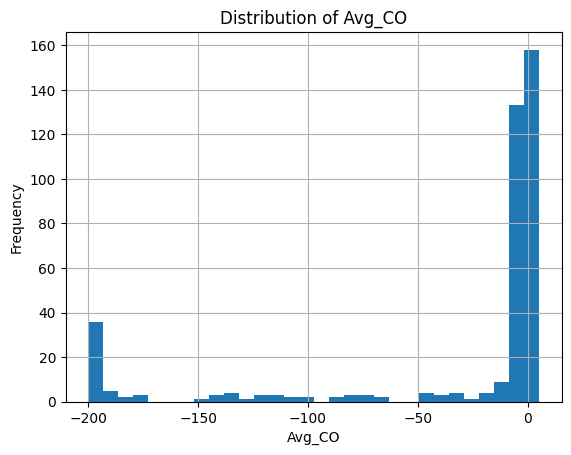

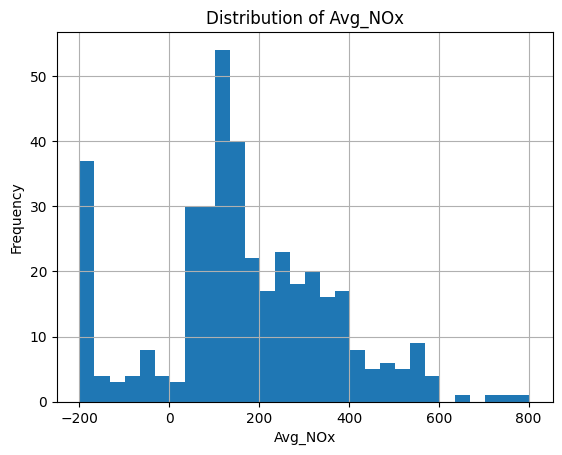

In [36]:
import matplotlib.pyplot as plt

#cleaned_data = data[data['Avg_CO'] > -200]
# Histogram for Avg_CO
data['Avg_CO'].hist(bins=30)
plt.title('Distribution of Avg_CO')
plt.xlabel('Avg_CO')
plt.ylabel('Frequency')
plt.show()

# Histogram for Avg_NOx
data['Avg_NOx'].hist(bins=30)
plt.title('Distribution of Avg_NOx')
plt.xlabel('Avg_NOx')
plt.ylabel('Frequency')
plt.show()


In [39]:
# Count the number of -200 values in Avg_CO and Avg_NOx columns
invalid_counts = data[['Avg_CO', 'Avg_NOx']].apply(lambda col: (col == -200).sum())
print("Count of -200 values:")
print(invalid_counts)

# Replace -200 with NaN (use assignment instead of inplace=True)
data['Avg_CO'] = data['Avg_CO'].replace(-200, pd.NA)
data['Avg_NOx'] = data['Avg_NOx'].replace(-200, pd.NA)

# Example: Fill missing values with the mean (if needed)
data['Avg_CO'] = data['Avg_CO'].fillna(data['Avg_CO'].mean())
data['Avg_NOx'] = data['Avg_NOx'].fillna(data['Avg_NOx'].mean())





Count of -200 values:
Avg_CO     0
Avg_NOx    0
dtype: int64


In [43]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
invalid_dates = data['Date'].isna().sum()
print(f"Number of invalid dates: {invalid_dates}")
data = data.dropna(subset=['Date'])



Number of invalid dates: 0


In [44]:
data = data.sort_values(by='Date')  # Sort by date if not already sorted
time_differences = data['Date'].diff()
print(time_differences.describe())


count                390
mean     1 days 00:00:00
std      0 days 00:00:00
min      1 days 00:00:00
25%      1 days 00:00:00
50%      1 days 00:00:00
75%      1 days 00:00:00
max      1 days 00:00:00
Name: Date, dtype: object


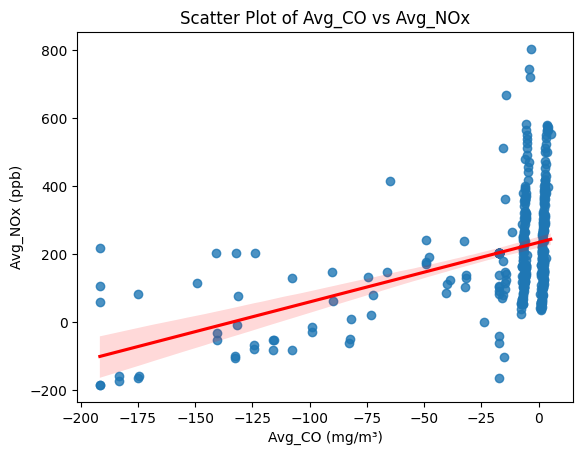

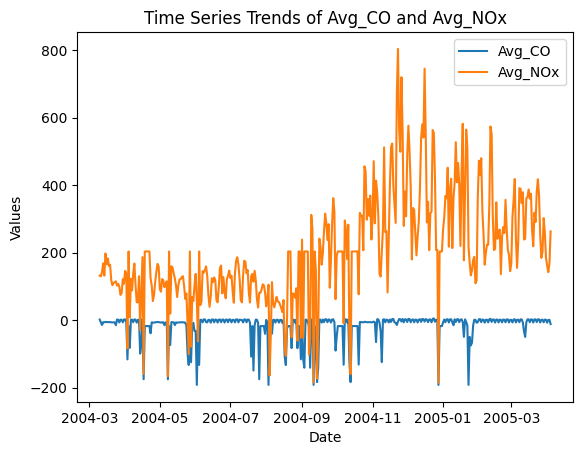

In [48]:
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Avg_CO', y='Avg_NOx', data=data, line_kws={"color": "red"})
plt.title('Scatter Plot of Avg_CO vs Avg_NOx')
plt.xlabel('Avg_CO (mg/m³)')
plt.ylabel('Avg_NOx (ppb)')
plt.show()

plt.plot(data['Date'], data['Avg_CO'], label='Avg_CO')
plt.plot(data['Date'], data['Avg_NOx'], label='Avg_NOx')
plt.legend()
plt.title('Time Series Trends of Avg_CO and Avg_NOx')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()


           Avg_CO   Avg_NOx
Avg_CO   1.000000  0.440819
Avg_NOx  0.440819  1.000000


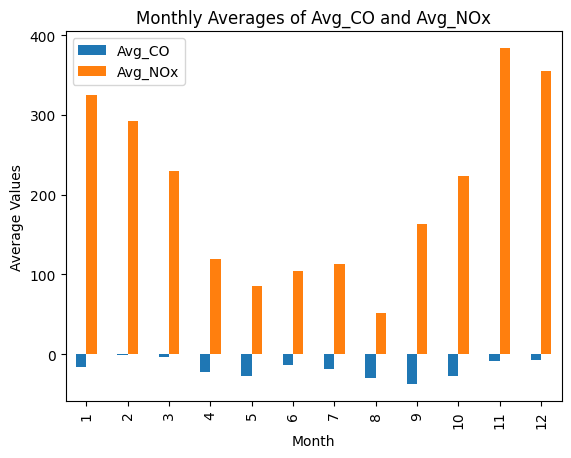

In [52]:
correlation = data[['Avg_CO', 'Avg_NOx']].corr()
print(correlation)


data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby('Month')[['Avg_CO', 'Avg_NOx']].mean()
monthly_avg.plot(kind='bar', title='Monthly Averages of Avg_CO and Avg_NOx')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.show()



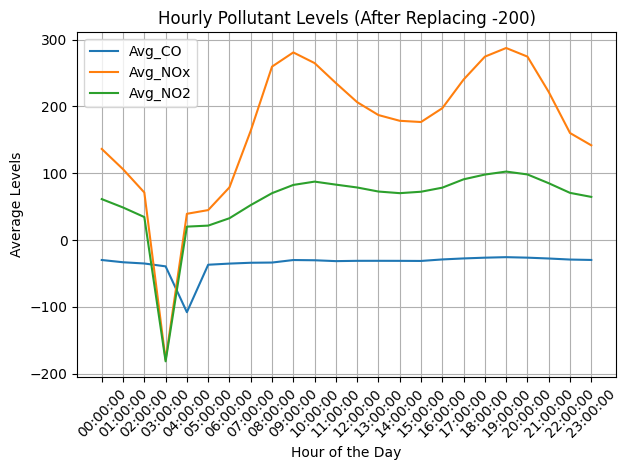

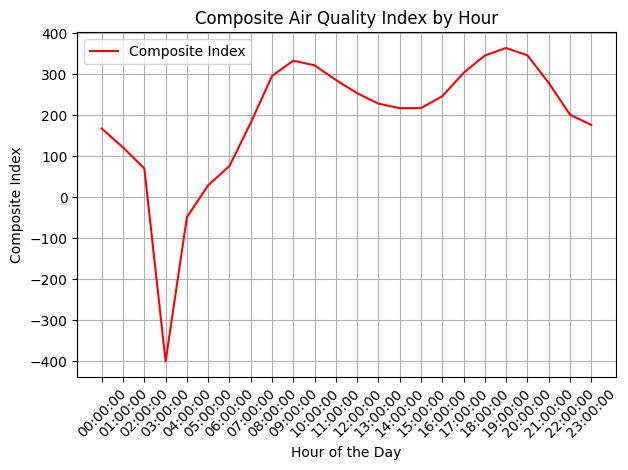

Cleaned data saved to /Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned_replaced.csv


In [67]:

# Count the number of -200 values in Avg_CO and Avg_NOx columns
invalid_counts = data[['Avg_CO', 'Avg_NOx','Avg_NO2']].apply(lambda col: (col == -200).sum())
print("Count of -200 values:")
print(invalid_counts)



Count of -200 values:
Avg_CO     0
Avg_NOx    0
Avg_NO2    0
dtype: int64


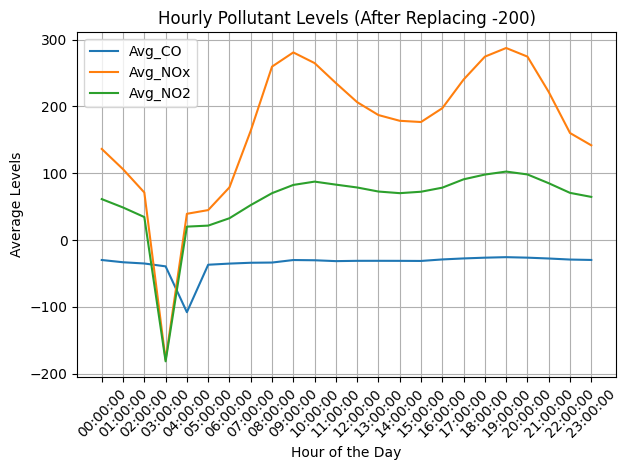

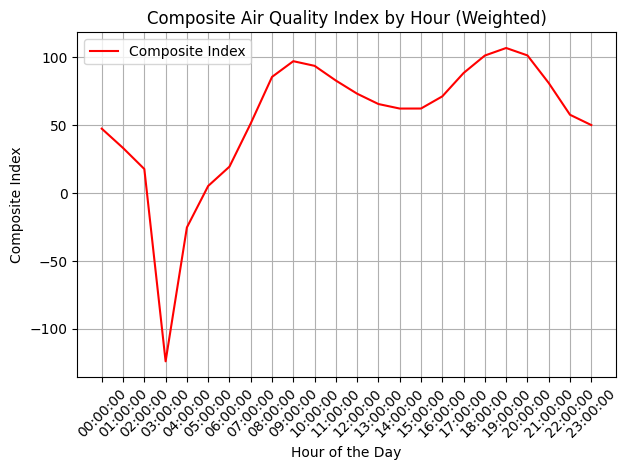

Cleaned data with weights saved to /Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned_with_weights.csv


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned.csv'
data = pd.read_csv(file_path)

# Replace -200 values with the column mean for pollutant columns
pollutants = ['Avg_CO', 'Avg_NOx', 'Avg_NO2']
for pollutant in pollutants:
    mean_value = data[data[pollutant] != -200][pollutant].mean()  # Calculate mean excluding -200
    data[pollutant] = data[pollutant].replace(-200, mean_value)  # Replace -200 with the mean

# Define weights for pollutants
weights = {'Avg_CO': 0.4, 'Avg_NOx': 0.3, 'Avg_NO2': 0.3}  # Adjust weights as necessary

# Calculate the weighted Composite Index
data['Composite_Index'] = (
    data['Avg_CO'] * weights['Avg_CO'] +
    data['Avg_NOx'] * weights['Avg_NOx'] +
    data['Avg_NO2'] * weights['Avg_NO2']
)

# Sort the data by Hour
data = data.sort_values(by='Hour')

# Plot pollutant levels by hour
plt.plot(data['Hour'], data['Avg_CO'], label='Avg_CO')
plt.plot(data['Hour'], data['Avg_NOx'], label='Avg_NOx')
plt.plot(data['Hour'], data['Avg_NO2'], label='Avg_NO2')
plt.title('Hourly Pollutant Levels (After Replacing -200)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Levels')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Ensure labels fit within the plot
plt.show()

# Plot composite index
plt.plot(data['Hour'], data['Composite_Index'], label='Composite Index', color='red')
plt.title('Composite Air Quality Index by Hour (Weighted)')
plt.xlabel('Hour of the Day')
plt.ylabel('Composite Index')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Ensure labels fit within the plot
plt.show()

# Save the updated dataset back to a file (optional)
output_path = '/Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned_with_weights.csv'
data.to_csv(output_path, index=False)
print(f"Cleaned data with weights saved to {output_path}")


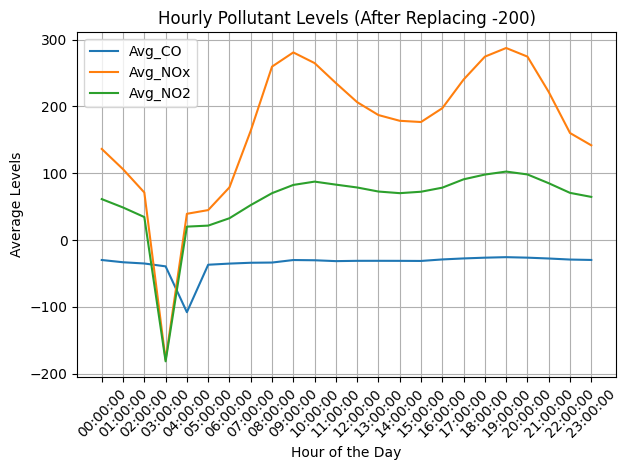

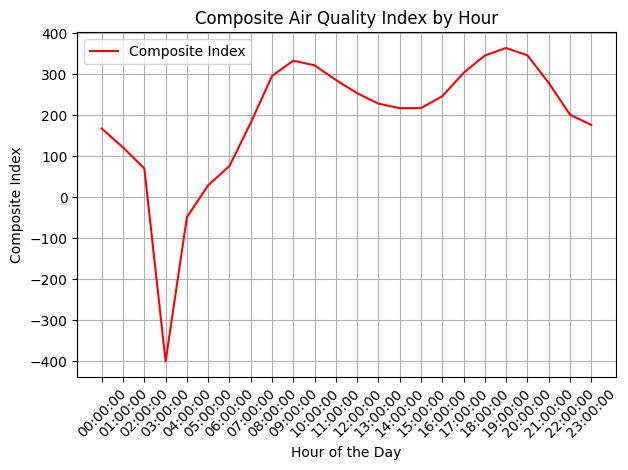

Cleaned data saved to /Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned_replaced.csv


Correlation between Temperature and Absolute Humidity: 0.6563969795767116


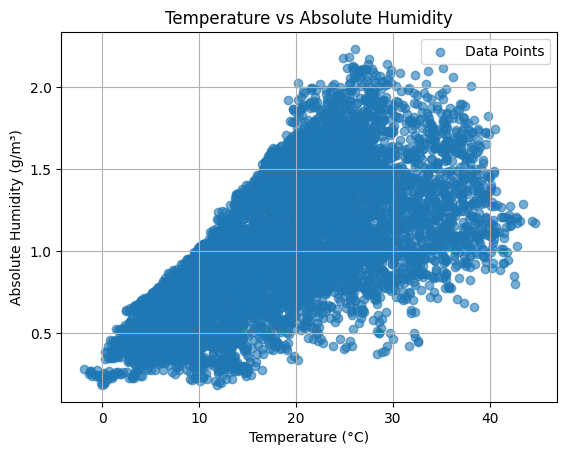

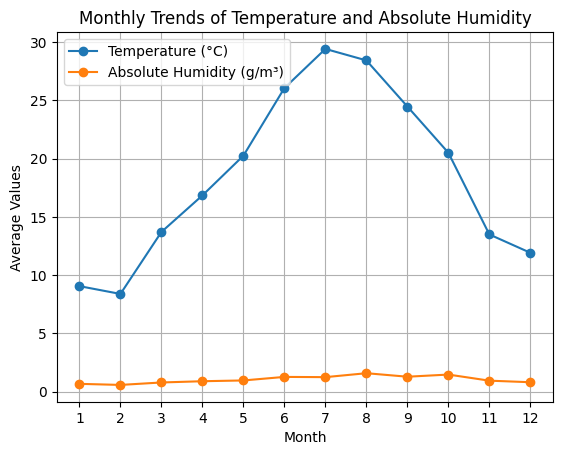

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques3.csv'  # Replace with actual file path
data = pd.read_csv(file_path)

# Replace -200 with column mean for both Temperature and Absolute_Humidity
columns_to_clean = ['Temperature', 'Absolute_Humidity']
for column in columns_to_clean:
    mean_value = data[data[column] != -200][column].mean()
    data[column] = data[column].replace(-200, mean_value)

# Convert Date to datetime format for further analysis
data['Date'] = pd.to_datetime(data['Date'])

# Correlation between Temperature and Absolute Humidity
correlation = data['Temperature'].corr(data['Absolute_Humidity'])
print(f"Correlation between Temperature and Absolute Humidity: {correlation}")

# Scatter plot: Temperature vs Absolute Humidity
plt.scatter(data['Temperature'], data['Absolute_Humidity'], alpha=0.6, label='Data Points')
plt.title('Temperature vs Absolute Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Absolute Humidity (g/m³)')
plt.grid()
plt.legend()
plt.show()

# Add a Month column for seasonal trend analysis
data['Month'] = data['Date'].dt.month

# Monthly trends for Temperature and Absolute Humidity
monthly_trends = data.groupby('Month')[['Temperature', 'Absolute_Humidity']].mean()

# Plot monthly trends
plt.plot(monthly_trends.index, monthly_trends['Temperature'], label='Temperature (°C)', marker='o')
plt.plot(monthly_trends.index, monthly_trends['Absolute_Humidity'], label='Absolute Humidity (g/m³)', marker='o')
plt.title('Monthly Trends of Temperature and Absolute Humidity')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()


Average Sensor Readings During Peak Traffic Hours (7 AM - 9 AM, 5 PM - 7 PM):
Sensor_CO      1216.211581
Sensor_NMHC    1104.544321
Sensor_NOx      723.448998
Sensor_NO2     1621.469488
Sensor_O3      1198.819154
dtype: float64


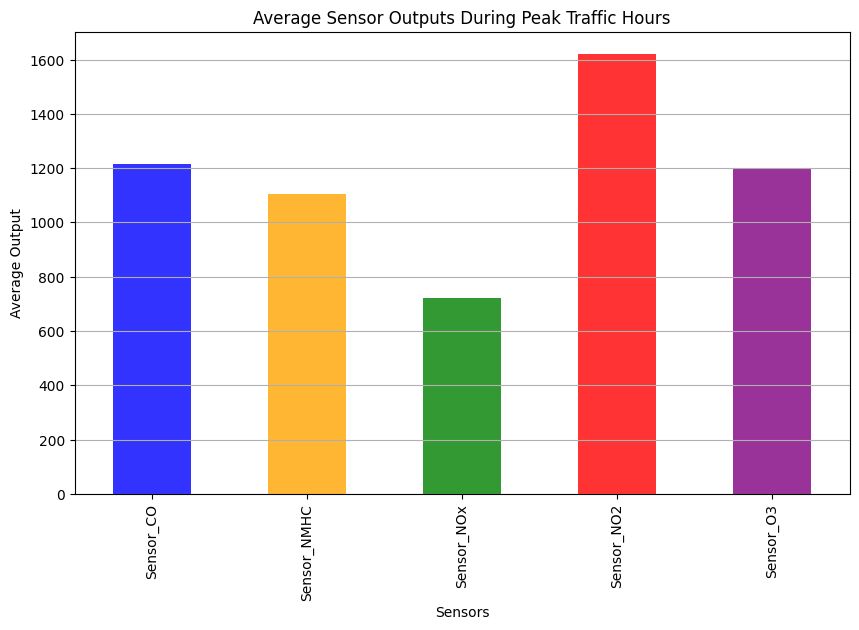

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques4.csv'  # Replace with actual file path
data_ques4 = pd.read_csv(file_path)

# Replace -200 values in numeric columns with the column mean
for column in data_ques4.columns:
    if data_ques4[column].dtype in ['float64', 'int64']:
        mean_value = data_ques4[column][data_ques4[column] != -200].mean()
        data_ques4[column] = data_ques4[column].replace(-200, mean_value)

# Convert 'Date' and 'Time' columns into a single DateTime column
data_ques4['DateTime'] = pd.to_datetime(data_ques4['Date'] + ' ' + data_ques4['Time'])

# Extract the hour from the DateTime for filtering peak traffic hours
data_ques4['Hour'] = data_ques4['DateTime'].dt.hour

# Filter data for peak traffic hours (7 AM - 9 AM and 5 PM - 7 PM)
peak_hours_data = data_ques4[(data_ques4['Hour'].isin([7, 8, 9, 17, 18, 19]))]

# Calculate the average readings for each sensor during peak traffic hours
sensor_avg_peak = peak_hours_data[['Sensor_CO', 'Sensor_NMHC', 'Sensor_NOx', 'Sensor_NO2', 'Sensor_O3']].mean()

# Display the sensor sensitivities during peak traffic hours
print("Average Sensor Readings During Peak Traffic Hours (7 AM - 9 AM, 5 PM - 7 PM):")
print(sensor_avg_peak)

# Visualization: Bar plot for average sensor readings
plt.figure(figsize=(10, 6))
sensor_avg_peak.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.8)
plt.title('Average Sensor Outputs During Peak Traffic Hours')
plt.xlabel('Sensors')
plt.ylabel('Average Output')
plt.grid(axis='y')
plt.show()


In [1]:
y = 50
print('Starting calculation...')
y = y + 20  # Fix: Assign the result of `y + 20` to `y`.
print(y)


Starting calculation...
70


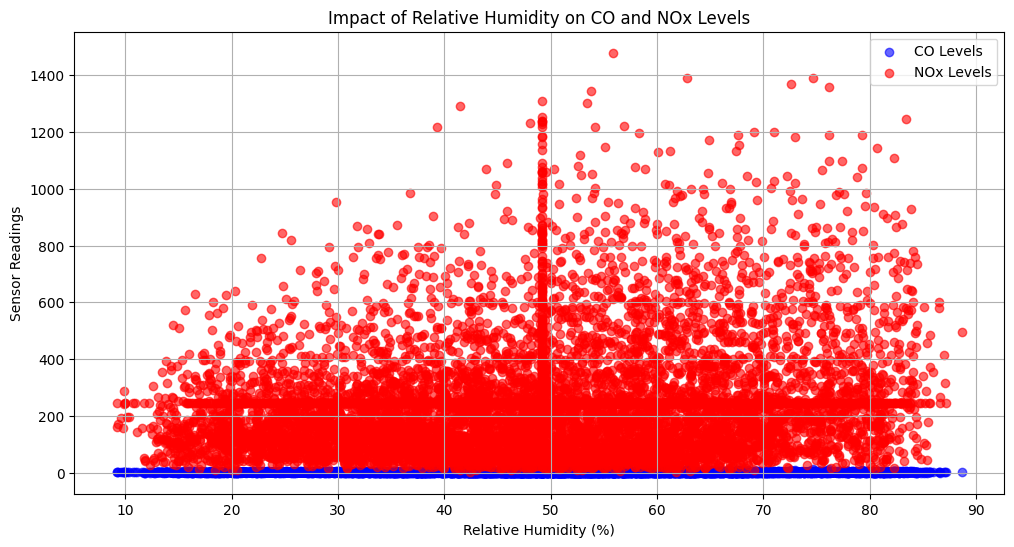

Average CO Level (Adjusted): 2.152749543914517
Average NOx Level (Adjusted): 246.89673490541588
Correlation between Relative Humidity and CO: 0.04319846614160837
Correlation between Relative Humidity and NOx: 0.19258744555166066


In [14]:

#QUestion 5
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques5.csv'  # Replace with actual file path
data_ques5 = pd.read_csv(file_path)

# Adjust '-200' values in the dataset with the mean of the respective column
for column in data_ques5.columns:
    if data_ques5[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        mean_value = data_ques5[column][data_ques5[column] != -200].mean()
        data_ques5[column] = data_ques5[column].replace(-200, mean_value)

# Calculate averages for CO and NOx levels
avg_co_adjusted = data_ques5['CO'].mean()
avg_nox_adjusted = data_ques5['NOx'].mean()

# Calculate correlations between Relative Humidity and pollutants
correlation_humidity_co = data_ques5['Relative_Humidity'].corr(data_ques5['CO'])
correlation_humidity_nox = data_ques5['Relative_Humidity'].corr(data_ques5['NOx'])

# Visualization: Impact of Relative Humidity on CO and NOx levels
plt.figure(figsize=(12, 6))
plt.scatter(data_ques5['Relative_Humidity'], data_ques5['CO'], alpha=0.6, label='CO Levels', color='blue')
plt.scatter(data_ques5['Relative_Humidity'], data_ques5['NOx'], alpha=0.6, label='NOx Levels', color='red')
plt.title('Impact of Relative Humidity on CO and NOx Levels')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Sensor Readings')
plt.legend()
plt.grid()
plt.show()

# Display results
print("Average CO Level (Adjusted):", avg_co_adjusted)
print("Average NOx Level (Adjusted):", avg_nox_adjusted)
print("Correlation between Relative Humidity and CO:", correlation_humidity_co)
print("Correlation between Relative Humidity and NOx:", correlation_humidity_nox)


/var/folders/fs/nlhdbllj2_70tz9r3b__txcm0000gn/T/ipykernel_2184/337569935.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data_ques5.groupby(bins).mean()


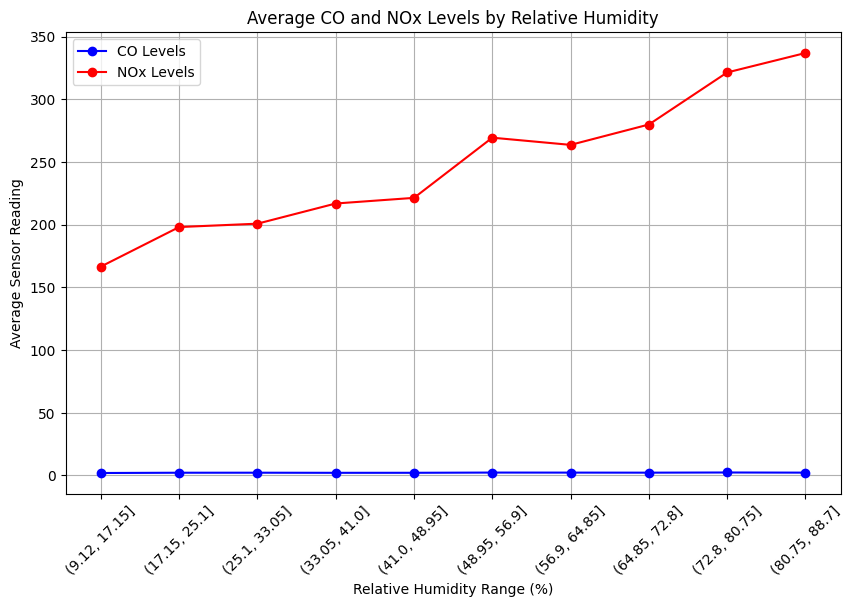

<Figure size 1000x600 with 0 Axes>

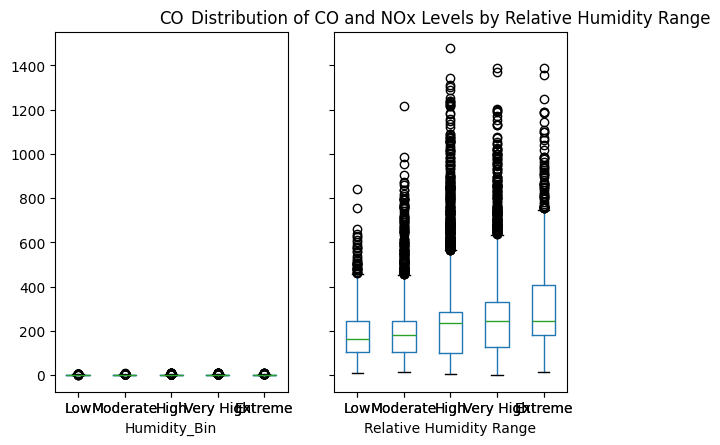

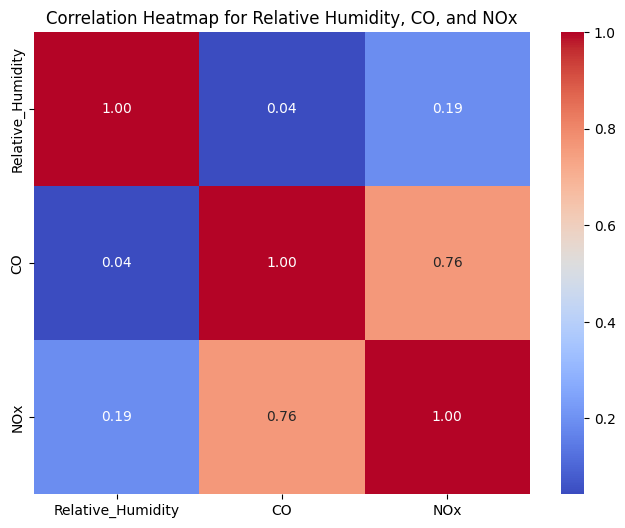

Average CO Level (Adjusted): 2.152749543914517
Average NOx Level (Adjusted): 246.89673490541588
Correlation between Relative Humidity and CO: 0.04319846614160837
Correlation between Relative Humidity and NOx: 0.19258744555166066


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques5.csv'  # Replace with actual file path
data_ques5 = pd.read_csv(file_path)


# Adjust '-200' values in the dataset with the mean of the respective column
for column in data_ques5.columns:
    if data_ques5[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        mean_value = data_ques5[column][data_ques5[column] != -200].mean()
        data_ques5[column] = data_ques5[column].replace(-200, mean_value)

# Calculate averages for CO and NOx levels
avg_co_adjusted = data_ques5['CO'].mean()
avg_nox_adjusted = data_ques5['NOx'].mean()

# Calculate correlations between Relative Humidity and pollutants
correlation_humidity_co = data_ques5['Relative_Humidity'].corr(data_ques5['CO'])
correlation_humidity_nox = data_ques5['Relative_Humidity'].corr(data_ques5['NOx'])

# Visualization 1: Line Plot
# Create bins for Relative Humidity
bins = pd.cut(data_ques5['Relative_Humidity'], bins=10)
binned_data = data_ques5.groupby(bins).mean()

plt.figure(figsize=(10, 6))
plt.plot(binned_data.index.astype(str), binned_data['CO'], marker='o', label='CO Levels', color='blue')
plt.plot(binned_data.index.astype(str), binned_data['NOx'], marker='o', label='NOx Levels', color='red')
plt.title('Average CO and NOx Levels by Relative Humidity')
plt.xlabel('Relative Humidity Range (%)')
plt.ylabel('Average Sensor Reading')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Box Plot
bins = pd.cut(data_ques5['Relative_Humidity'], bins=5, labels=['Low', 'Moderate', 'High', 'Very High', 'Extreme'])
data_ques5['Humidity_Bin'] = bins

plt.figure(figsize=(10, 6))
data_ques5.boxplot(column=['CO', 'NOx'], by='Humidity_Bin', grid=False)
plt.title('Distribution of CO and NOx Levels by Relative Humidity Range')
plt.suptitle("")  # Remove the default title
plt.xlabel('Relative Humidity Range')
plt.ylabel('Sensor Reading')
plt.show()

# Visualization 3: Heatmap
corr_matrix = data_ques5[['Relative_Humidity', 'CO', 'NOx']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Relative Humidity, CO, and NOx')
plt.show()

# Display results
print("Average CO Level (Adjusted):", avg_co_adjusted)
print("Average NOx Level (Adjusted):", avg_nox_adjusted)
print("Correlation between Relative Humidity and CO:", correlation_humidity_co)
print("Correlation between Relative Humidity and NOx:", correlation_humidity_nox)


KeyError: 'Month'

<Figure size 1200x600 with 0 Axes>

Column Names in the Dataset: Index(['Month', 'Avg_CO', 'Avg_NOx', 'Avg_NO2'], dtype='object')


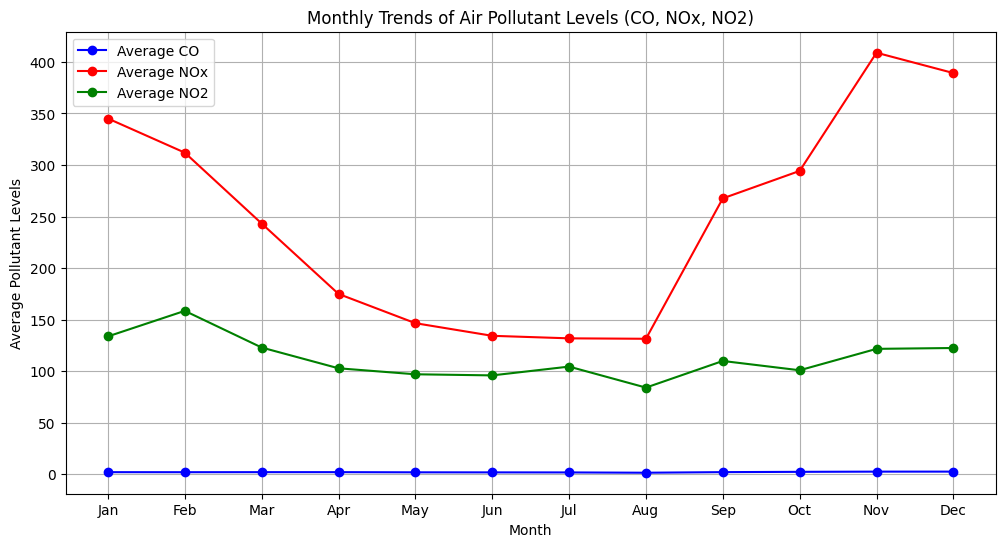

In [35]:
#Question 6

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques6.csv'  # Replace with actual file path
data = pd.read_csv(file_path)


# Display the column names for verification
print("Column Names in the Dataset:", data.columns)


# Ensure column names match the dataset
# Replace 'Month', 'Avg_CO', 'Avg_NOx', 'Avg_NO2' with actual column names from the dataset
month_column = 'Month'  # Update this based on the actual dataset
avg_co_column = 'Avg_CO'  # Update this based on the actual dataset
avg_nox_column = 'Avg_NOx'  # Update this based on the actual dataset
avg_no2_column = 'Avg_NO2'  # Update this based on the actual dataset

# Plot the monthly trends for CO, NOx, and NO2
plt.figure(figsize=(12, 6))

# Line plot for CO
plt.plot(data[month_column], data[avg_co_column], marker='o', label='Average CO', color='blue')

# Line plot for NOx
plt.plot(data[month_column], data[avg_nox_column], marker='o', label='Average NOx', color='red')

# Line plot for NO2
plt.plot(data[month_column], data[avg_no2_column], marker='o', label='Average NO2', color='green')

# Adding titles and labels
plt.title('Monthly Trends of Air Pollutant Levels (CO, NOx, NO2)')
plt.xlabel('Month')
plt.ylabel('Average Pollutant Levels')
plt.legend()
plt.grid()
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()



In [38]:
#Question 7


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques7.csv'  # Replace with actual file path
data = pd.read_csv(file_path)


# Display the column names for verification
print("Column Names in the Dataset:", data.columns)



# Find the row with the highest Composite AQI
highest_aqi_row = data.loc[data['Composite_AQI'].idxmax()]

# Display the result
print("Date with the highest Composite AQI:")
print(highest_aqi_row)


Column Names in the Dataset: Index(['Date', 'Avg_CO', 'Avg_NOx', 'Avg_NO2', 'Composite_AQI'], dtype='object')
Date with the highest Composite AQI:
Date             2004-11-23
Avg_CO             4.939698
Avg_NOx          822.412364
Avg_NO2          160.920469
Composite_AQI    329.424177
Name: 0, dtype: object


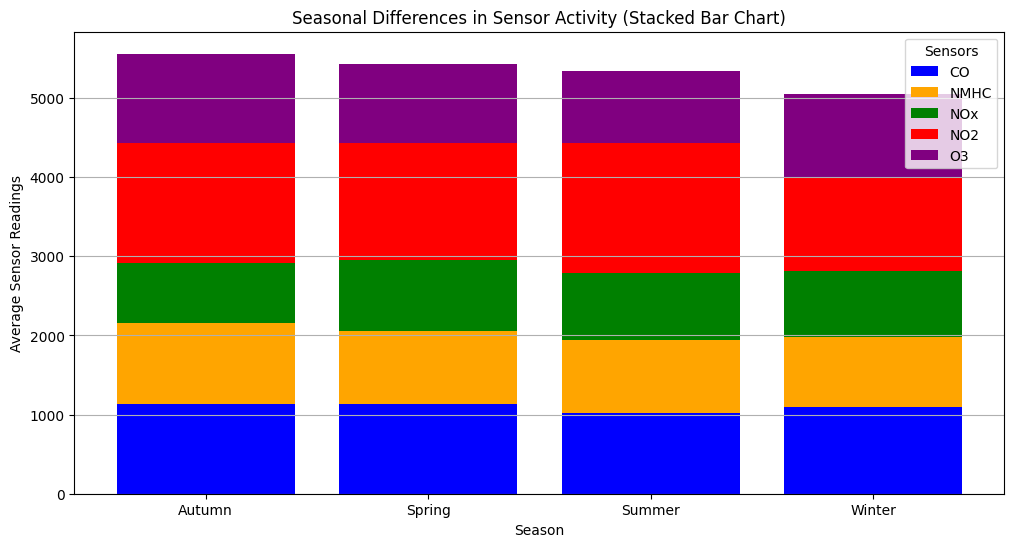

In [42]:

#Quesiton 8

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques8.csv'  # Replace with actual file path
data = pd.read_csv(file_path)



# Define the sensors to be plotted
sensors = ['Avg_Sensor_CO', 'Avg_Sensor_NMHC', 'Avg_Sensor_NOx', 'Avg_Sensor_NO2', 'Avg_Sensor_O3']
sensor_labels = ['CO', 'NMHC', 'NOx', 'NO2', 'O3']
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bottom_values = [0] * len(data)  # Initialize the bottom of the bar

for sensor, label, color in zip(sensors, sensor_labels, colors):
    plt.bar(data['Season'], data[sensor], bottom=bottom_values, label=label, color=color)
    # Update the bottom values for the next stack
    bottom_values = [i + j for i, j in zip(bottom_values, data[sensor])]

# Add titles and labels
plt.title('Seasonal Differences in Sensor Activity (Stacked Bar Chart)')
plt.xlabel('Season')
plt.ylabel('Average Sensor Readings')
plt.legend(title='Sensors')
plt.grid(axis='y')

# Show the chart
plt.show()






In [2]:
# Define the function
def count_uppercase(s):
    # Initialize a local count variable to 0
    count = 0
    # Iterate through each character in the string
    for char in s:
        # Check if the character is uppercase using .isupper()
        if char.isupper():
            count += 1  # Increment the count
    # Return the final count
    return count

#------------------------------

# Program execution starts here

# Given variable
text = 'The Quick Brown Fox Jumped Over The Lazy Dog'

# Call the function and store the result
result = count_uppercase(text)

# Print the result
print("The number of uppercase letters is:", result)


The number of uppercase letters is: 9
